GW-LIGO-VIRGO-Workshop4

Day 1

1.1 Discovering open data

*   Software installation





In [ ]:
! pip install -q 'gwosc==0.5.4'

#to check the version of the package gwosc you are using
import gwosc
print(gwosc.__version__)

The module gwosc.datasets provides tools for searching for datasets, including events, catalogs and full run strain data releases.

We get event information from following: 

[Event Portal](https://gw-openscience.org/eventapi)



In [ ]:
from gwosc.datasets import find_datasets
from gwosc import datasets

#-- List all available catalogs
print("List of available catalogs")
print(find_datasets(type="catalog"))
print("")

#-- Print all the GW events from the GWTC-1 catalog
gwtc1 = datasets.find_datasets(type='events', catalog='GWTC-1-confident')
print('GWTC-1 events:', gwtc1)
print("")

Question statement 1: 

    How many months did O2 last? (Hint: check the output of find_datasets(type='run') to find the correct label to use)
    How many GWTC-1-confident events were detected during O1?
    What file URL contains data for V1 4096 seconds around GW170817?



In [ ]:
#tut 1.1 Q.1 
! pip install -q 'gwosc==0.5.4'
import gwosc
from gwosc.datasets import find_datasets
from gwosc import datasets
runs = find_datasets(type='run')
from gwosc.datasets import run_segment
print(run_segment('O2_16KHZ_R1'))

In [ ]:
#tut 1.1 Q.2
O1_events = datasets.find_datasets(type='events', catalog='GWTC-1-confident', segment=run_segment('O1'))
print(O1_events)

In [ ]:
from gwosc.locate import get_event_urls
urls = get_event_urls('GW170817')
print(urls)

Quiz Question 1:

The peak amplitude in the LIGO-Livingston data occurs at approximately 5 seconds into the plot above and is undetectable above the background noise by the eye. Plot the data for the LIGO-Hanford detector around GW190412. Looking at your new LIGO-Handford plot, can your eye identify a signal peak? 

In [ ]:
! pip install -q 'gwpy==2.0.2'
import gwpy
from gwosc.datasets import event_gps
gps = event_gps('GW190412')
print(gps)
segment = (int(gps)-5, int(gps)+5)
print(segment)
from gwpy.timeseries import TimeSeries
hdata = TimeSeries.fetch_open_data('H1', *segment, verbose=True)
print(ldata)

%matplotlib inline
plot = hdata.plot()

#frequency domain using fourier transformation
fft = hdata.fft()
print(fft)

#extracting amplitude and plotting it
plot = fft.abs().plot(xscale="log", yscale="log")
plot.show(warn=False)

#using scipi module
from scipy.signal import get_window
window = get_window('hann', hdata.size)
hwin = hdata * window

fftamp = hwin.fft().abs()
plot = fftamp.plot(xscale="log", yscale="log")
plot.show(warn=False)

#Calculating the power spectral density using Welch's method
asd = hdata.asd(fftlength=4, method="median")
plot = asd.plot()
plot.show(warn=False)

ax = plot.gca()
ax.set_xlim(10, 1400)
ax.set_ylim(1e-24, 1e-20)
plot

hdata2 = TimeSeries.fetch_open_data('H1', int(gps)-512, int(gps)+512, cache=True)
hasd2 = hdata2.asd(fftlength=4, method="median")
plot = hasd2.plot()
ax = plot.gca()
ax.set_xlim(10, 1400)
ax.set_ylim(1e-24, 1e-20)
plot.show(warn=False)

Quiz Question 2:

Make an ASD around the time of an O1 event, GW150914 for L1 detector. Compare this with the ASDs around GW190412 for L1 detector. Which data have lower noise - and so are more sensitive - around 100 Hz?

Q-scan challenge!

    Download the data for all detectors involved with the GW170814 detection. Which detectors registered this event?
    generate a Q-scan for the data in each detector. (Hint: try using a much smaller time range and Q-range than you did for GW170817)



In [ ]:
! pip install -q 'gwpy==2.0.2'
%matplotlib inline
import gwpy

from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries

gps = event_gps('GW170817')
print("GW170817 GPS:", gps)

ldata = TimeSeries.fetch_open_data('V1', int(gps)-512, int(gps)+512, cache=True)
print("GW170817 data")
print(ldata)

specgram = ldata.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plot = specgram.plot()

ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10, 1400)
ax.colorbar(
    clim=(1e-24, 1e-20),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)
plot

Exercise

Generate and plot the waveform associated to the binary neutron star merger GW170817. Look up the GWTC-1 catalog page to obtain the estimated parameters for this source.


In [ ]:
! pip install -q 'gwpy==2.0.2'
%matplotlib inline
import gwpy
from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries

gps = event_gps('GW170817')

ldata = TimeSeries.fetch_open_data('L1', int(gps)-512, int(gps)+512, cache=True)
hdata = TimeSeries.fetch_open_data('H1', int(gps)-512, int(gps)+512, cache=True)
vdata = TimeSeries.fetch_open_data('V1', int(gps)-512, int(gps)+512, cache=True)

#print("livingston_data",ldata)
#print("hanford_data",hdata)
#print("virgo_data",vdata)

#hq = hdata.q_transform(frange=(30, 500), qrange=(100, 110))
#plot = hq.plot()
#ax = plot.gca()
#ax.set_epoch(gps)
#ax.set_yscale('log')
#ax.colorbar(label="Normalised energy") 

lq = ldata.q_transform(frange=(30, 500), qrange=(80, 100), outseg=(gps-3,gps+0.5)) 
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

plot = lq.plot()

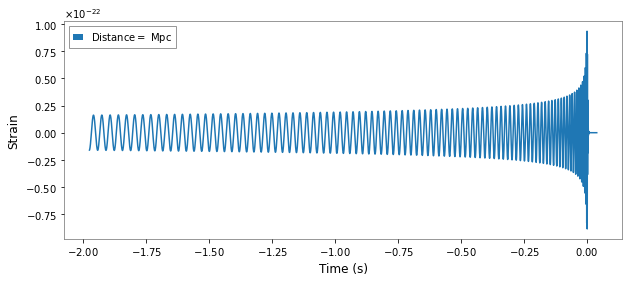

In [ ]:
#TUTORIAL 1.4

! pip install -q 'PyCBC==1.18.0' 'lalsuite==6.82'
%matplotlib inline

from pycbc.waveform import get_td_waveform
import pylab
pylab.figure(figsize=pylab.figaspect(0.4))

hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         f_lower=30,
                         distance=5*500)
    
pylab.plot(hp.sample_times, hp, label='Distance$=%s$ Mpc' )
pylab.legend()
pylab.grid()
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.show()

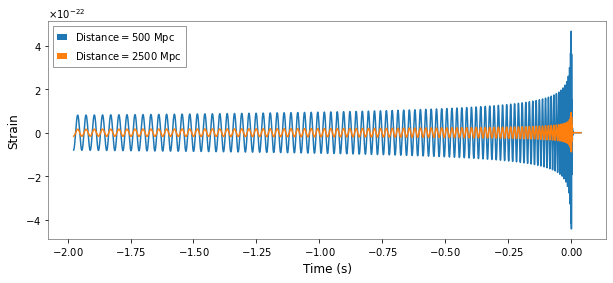

In [ ]:
pylab.figure(figsize=pylab.figaspect(0.4))
for d in [500,2500]:
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         f_lower=30,
                         distance=d)
    
    pylab.plot(hp.sample_times, hp, label='Distance$=%s$ Mpc' % d)
pylab.legend()
pylab.grid()
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.show()

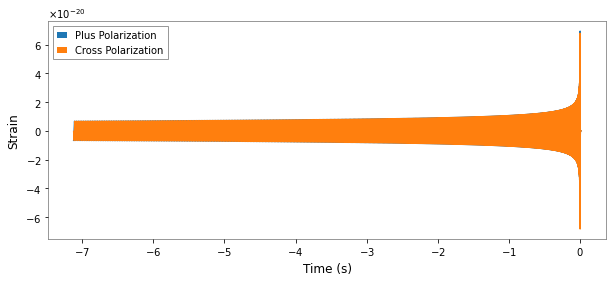

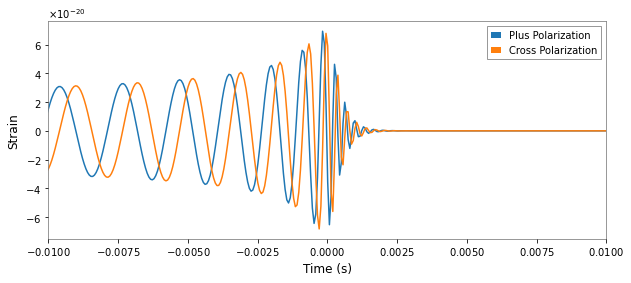

In [ ]:
# The outputs of this function are the "plus" and "cross" polarizations 
# of the gravitational-wave signal as viewed from the line of sight at 
# a given source inclination (assumed face-on, i.e. zero inclination
# if not provided)
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=2.73,
                         mass2=3.29,
                         delta_t=1.0/16384,
                         f_lower=40)

pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.legend()
pylab.grid()
pylab.show()

# Zoom in near the merger time
pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.xlim(-.01, .01)
pylab.legend()
pylab.grid()
pylab.show()